In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df=pd.read_csv('Vehicle_Insurance.csv')

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
df.shape

(381109, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Data Cleaning

In [8]:
#Removing id column 
df.drop(["id"],axis=1,inplace=True)

In [9]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
#Checking if there is duplicate data present in dataset
df.duplicated().sum()

np.int64(269)

In [10]:
#drop Duplicte rows
df=df.drop_duplicates()

In [11]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [12]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Outliers

<Axes: ylabel='Annual_Premium'>

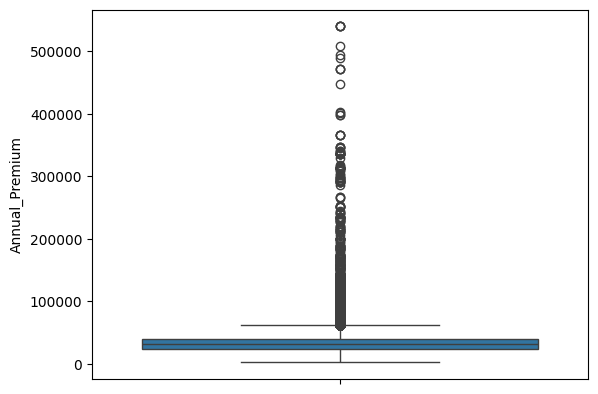

In [13]:
sns.boxplot(df['Annual_Premium'])

In [14]:
q1=df['Annual_Premium'].quantile(0.25)
q3=df['Annual_Premium'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df[(df['Annual_Premium']<lower_bound)|(df['Annual_Premium']>upper_bound)]
outliers

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...
380959,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [15]:
df.Annual_Premium=np.where(df.Annual_Premium>upper_bound,upper_bound,df.Annual_Premium)

C:\Users\HP\AppData\Local\Temp\ipykernel_10992\1844429323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Annual_Premium=np.where(df.Annual_Premium>upper_bound,upper_bound,df.Annual_Premium)


In [16]:
df[df.Annual_Premium>upper_bound]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [10]:
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

### Data Visualization

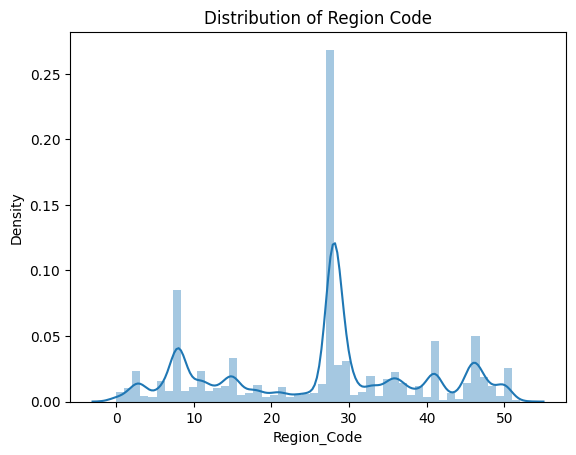

In [11]:
sns.distplot(df.Region_Code)
plt.title('Distribution of Region Code')
plt.show()

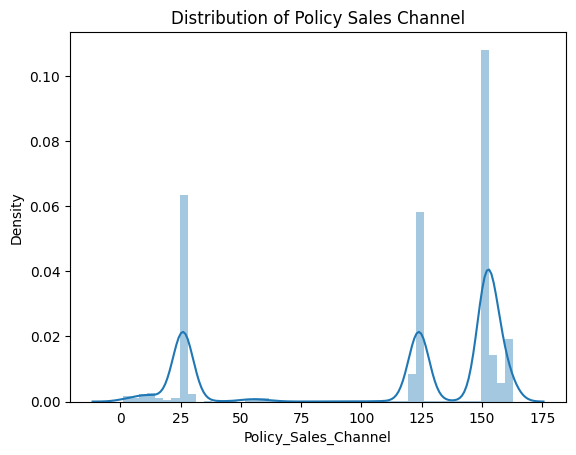

In [12]:
sns.distplot(df.Policy_Sales_Channel)
plt.title('Distribution of Policy Sales Channel')
plt.show()

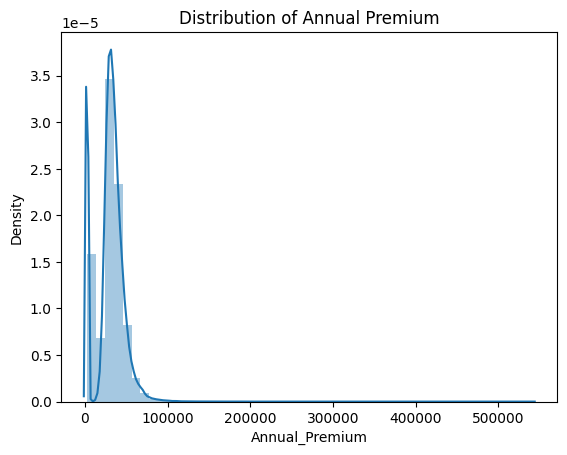

In [13]:
sns.distplot(df.Annual_Premium)
plt.title('Distribution of Annual Premium')
plt.show()

#### Gender wise average annual premium

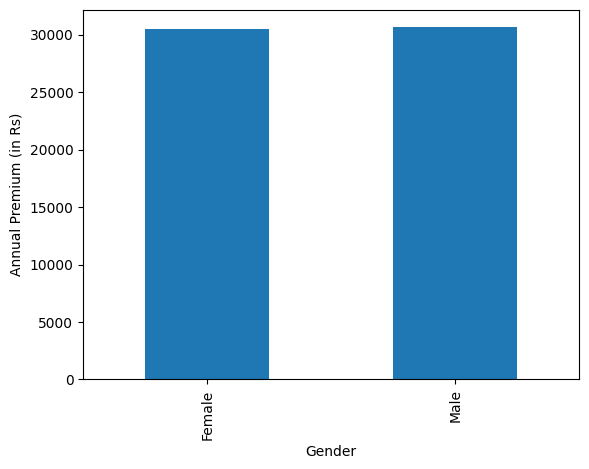

In [22]:
df.groupby('Gender')['Annual_Premium'].mean().plot.bar(ylabel = 'Annual Premium (in Rs)')
plt.show()

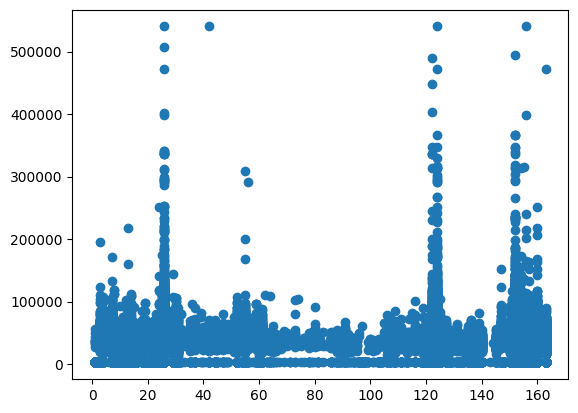

In [26]:
plt.scatter(df["Policy_Sales_Channel"],df["Annual_Premium"])
plt.show()

In [ ]:
print('Age wise average annual premium')
print(df.groupby('Age')['Annual_Premium'].mean())

#### Age wise average annual premium

<Axes: xlabel='Age'>

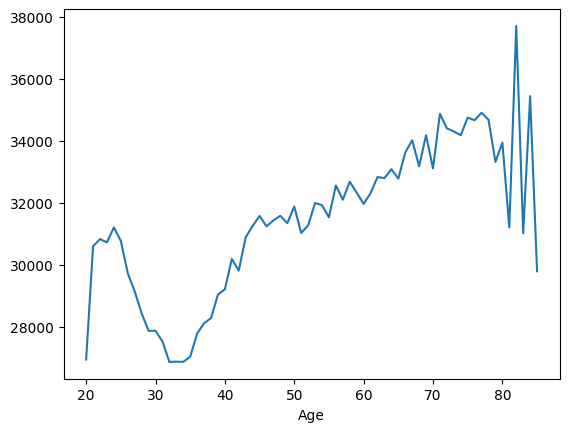

In [31]:
df.groupby('Age')['Annual_Premium'].mean().plot()

In [17]:
df[df.Annual_Premium<3000]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
15,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
30,Female,26,1,8.0,0,< 1 Year,No,2630.0,160.0,136,0
43,Female,38,1,35.0,1,1-2 Year,No,2630.0,152.0,153,0
58,Female,62,1,48.0,0,1-2 Year,Yes,2630.0,15.0,295,0
...,...,...,...,...,...,...,...,...,...,...,...
381070,Female,28,1,11.0,0,< 1 Year,Yes,2630.0,124.0,106,0
381086,Female,34,1,35.0,0,1-2 Year,Yes,2630.0,152.0,208,0
381092,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,130,0
381094,Female,47,1,20.0,0,1-2 Year,Yes,2630.0,26.0,84,0


#### Vehicle age wise average annual premium

<Axes: xlabel='Vehicle_Age'>

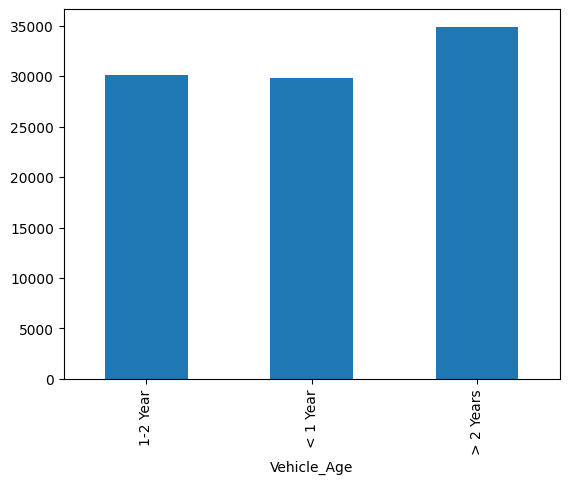

In [19]:
df.groupby('Vehicle_Age')['Annual_Premium'].mean().plot.bar()

### Feature Analysis

In [14]:
df.Annual_Premium.mean()

np.float64(30564.389581458323)

In [15]:
df.Annual_Premium.median()

np.float64(31669.0)

In [16]:
df.Annual_Premium.value_counts()

Annual_Premium
2630.0     64877
69856.0      140
39008.0       41
45179.0       38
38287.0       38
           ...  
48221.0        1
77831.0        1
18575.0        1
58084.0        1
17560.0        1
Name: count, Length: 48838, dtype: int64

In [17]:
df.Annual_Premium.min()

np.float64(2630.0)

In [18]:
df.Annual_Premium.max()

np.float64(540165.0)

In [19]:
df.Annual_Premium.std()

np.float64(17213.155056980126)

In [20]:
df.Annual_Premium.var()

np.float64(296292707.01564044)

In [21]:
df.Policy_Sales_Channel.mean()

np.float64(112.03429465061177)

In [22]:
df.Policy_Sales_Channel.median()

np.float64(133.0)

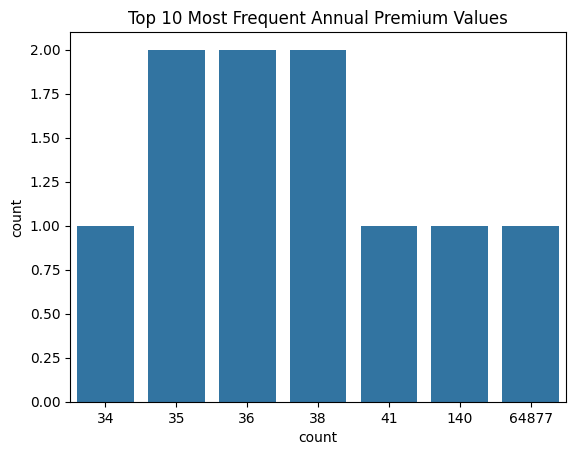

In [24]:
sns.countplot(x=df.Annual_Premium.value_counts().sort_values(ascending= False).head(10))
plt.title('Top 10 Most Frequent Annual Premium Values')
plt.show()

In [25]:
df.Vehicle_Damage.value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

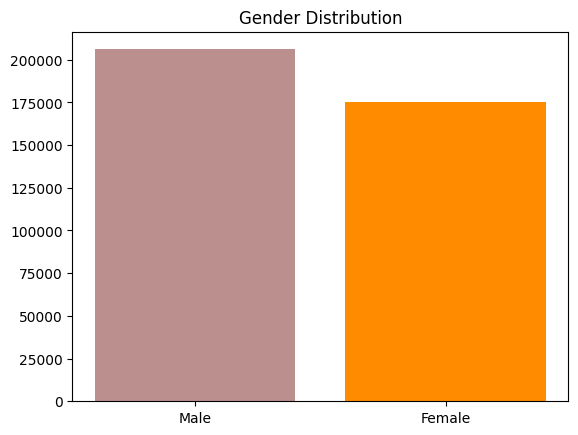

In [29]:
plt.bar(x = df.Gender.value_counts().index,
           height = df.Gender.value_counts(),color=['rosybrown','darkorange'])
plt.title('Gender Distribution')
plt.show()

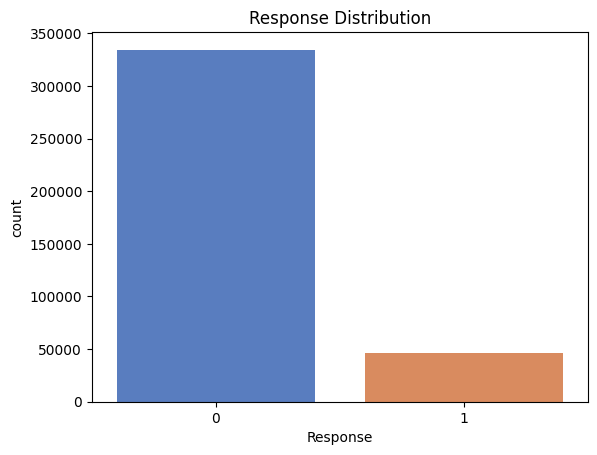

In [36]:
sns.barplot(x = df.Response.value_counts().index,
           y = df.Response.value_counts(),palette='muted')
plt.title('Response Distribution')
plt.show()

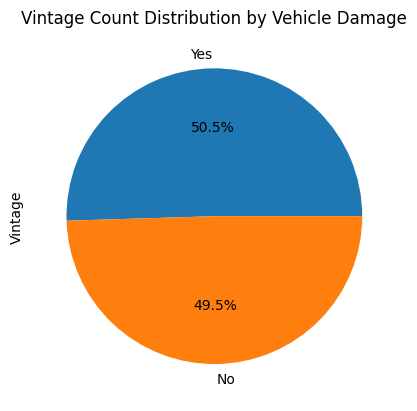

In [37]:
df.groupby('Vehicle_Damage')['Vintage'].count().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title('Vintage Count Distribution by Vehicle Damage')
plt.show()

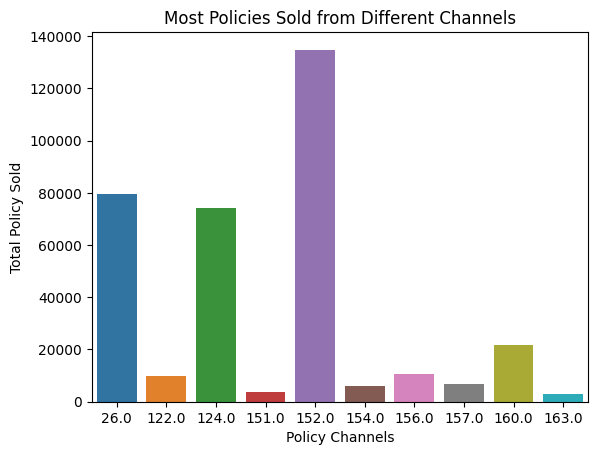

In [38]:
# Most Policy sold from channels

sns.barplot(x = df.Policy_Sales_Channel.value_counts().head(10).index,
           y = df.Policy_Sales_Channel.value_counts().head(10),palette='tab10')
plt.xlabel('Policy Channels')
plt.ylabel('Total Policy Sold')
plt.title('Most Policies Sold from Different Channels')
plt.show()

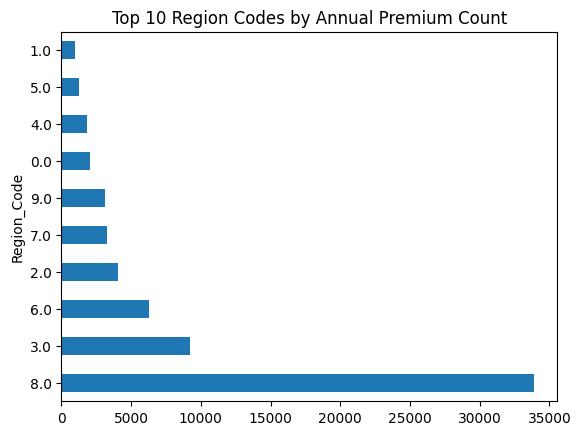

In [4]:
df.groupby('Region_Code')['Annual_Premium'].count().head(10).sort_values(ascending=False).plot(kind='barh')
plt.title('Top 10 Region Codes by Annual Premium Count')
plt.show()

#### Age Distribution

In [5]:
df.Age.value_counts()

Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64

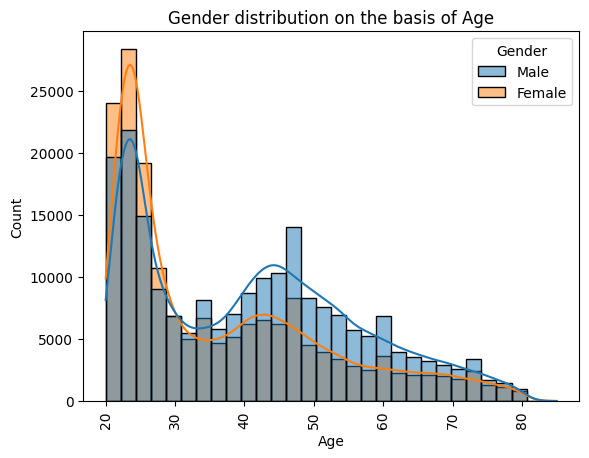

In [6]:
sns.histplot(x=df.Age, hue=df.Gender, kde=True, bins=30)
plt.xticks(rotation=90)
plt.title('Gender distribution on the basis of Age')
plt.show()

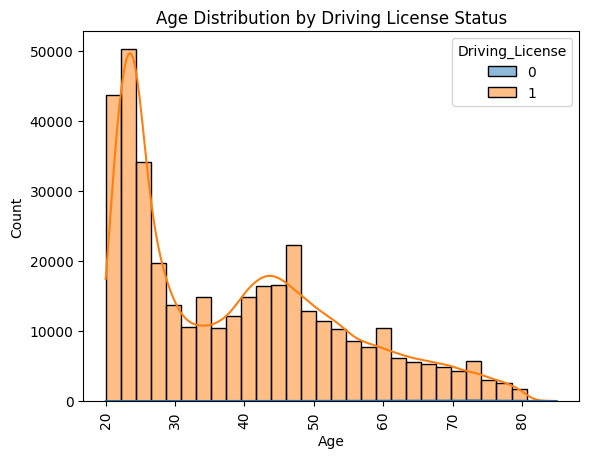

In [4]:
sns.histplot(x=df.Age, hue=df.Driving_License, kde=True, bins=30)
plt.xticks(rotation=90)
plt.title('Age Distribution by Driving License Status')
plt.show()

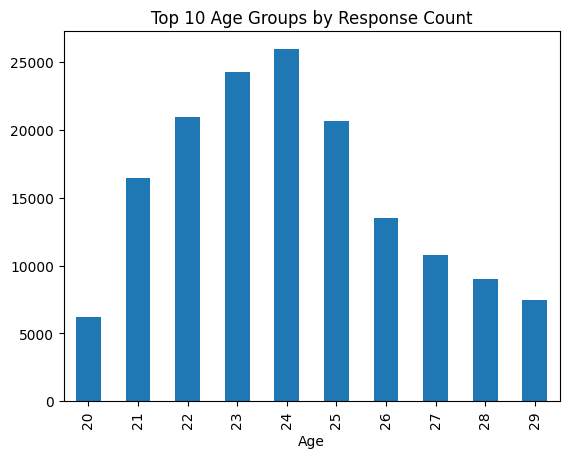

In [5]:
df.groupby('Age')['Response'].count().head(10).plot(kind='bar')
plt.title('Top 10 Age Groups by Response Count')
plt.show()

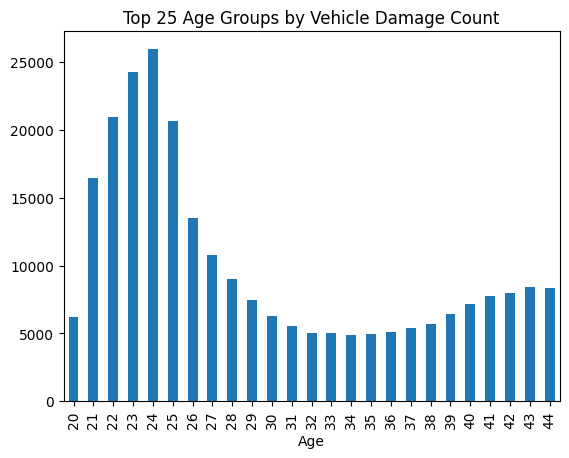

In [6]:
df.groupby('Age')['Vehicle_Damage'].count().head(25).plot(kind='bar')
plt.title('Top 25 Age Groups by Vehicle Damage Count')
plt.xticks(rotation=90)
plt.show()

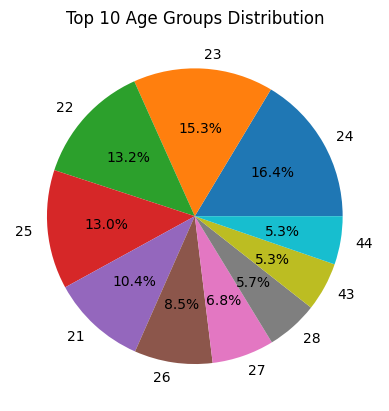

In [7]:
plt.pie(x=df.Age.value_counts().head(10),labels=df.Age.value_counts().head(10).index,autopct='%1.1f%%')
plt.title('Top 10 Age Groups Distribution')
plt.show()

#### Premium Analysis

In [8]:
df.corr(numeric_only=True)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


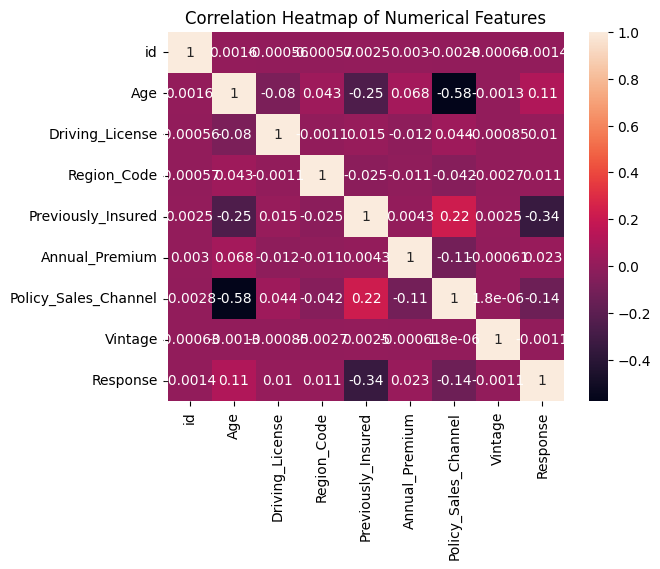

In [9]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Claim Frequencies

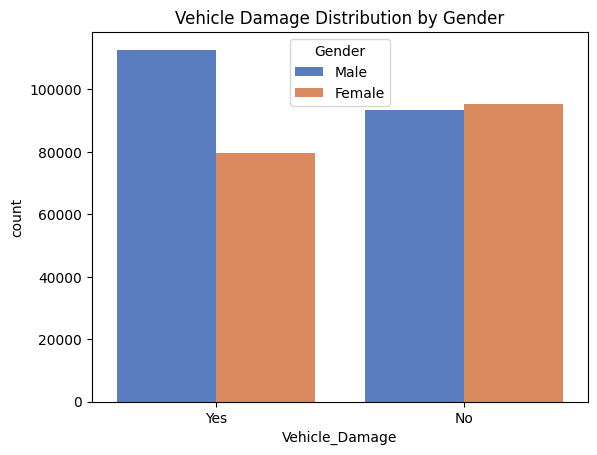

In [10]:
sns.countplot(x=df.Vehicle_Damage,hue=df.Gender,palette='muted')
plt.title('Vehicle Damage Distribution by Gender')
plt.show()

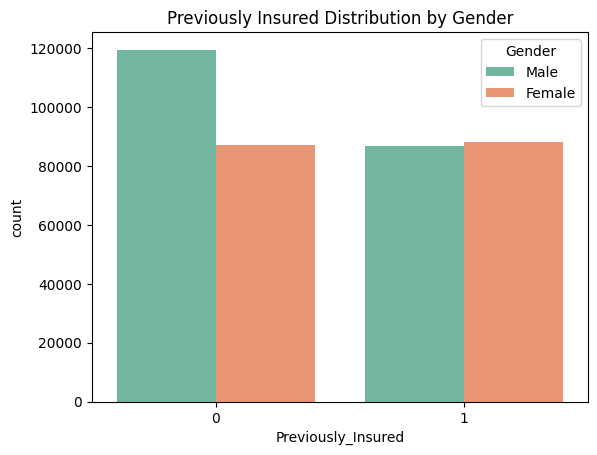

In [13]:
sns.countplot(x=df.Previously_Insured,hue=df.Gender,palette='Set2')
plt.title('Previously Insured Distribution by Gender')
plt.show()

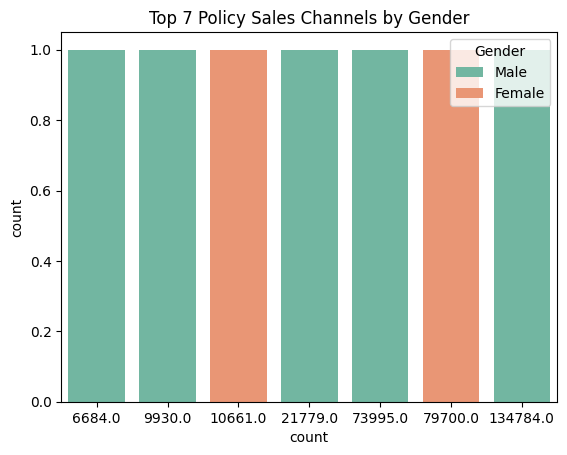

In [14]:
sns.countplot(x=df.Policy_Sales_Channel.value_counts().head(7),hue=df.Gender,palette='Set2')
plt.title('Top 7 Policy Sales Channels by Gender')
plt.show()

#### Vehicle Age and Claims

In [15]:
df.Vehicle_Age.value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

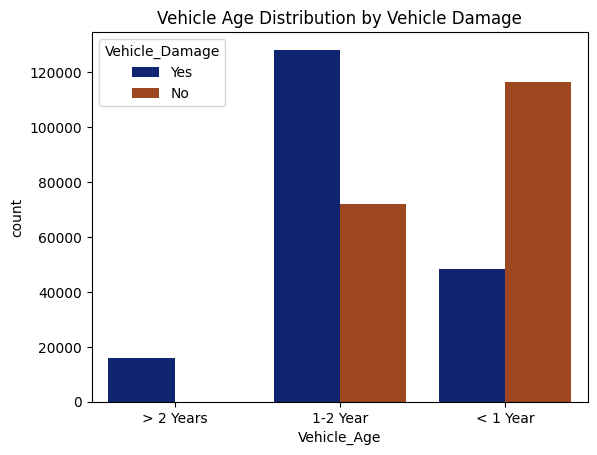

In [16]:
sns.countplot(x=df.Vehicle_Age,hue=df.Vehicle_Damage,palette='dark')
plt.title('Vehicle Age Distribution by Vehicle Damage')
plt.show()

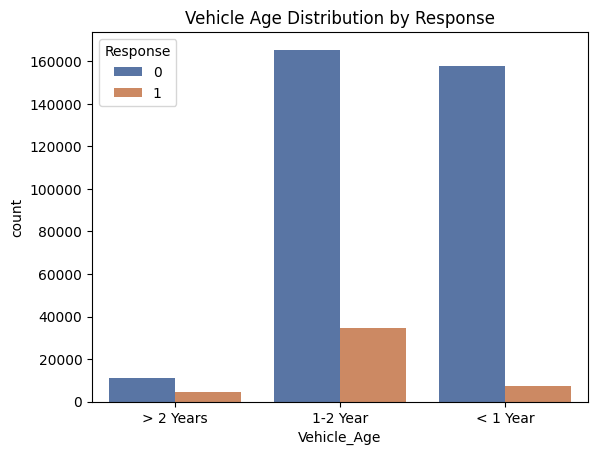

In [17]:
sns.countplot(x=df.Vehicle_Age,hue=df.Response,palette='deep')
plt.title('Vehicle Age Distribution by Response')
plt.show()

#### Region-wise Analysis

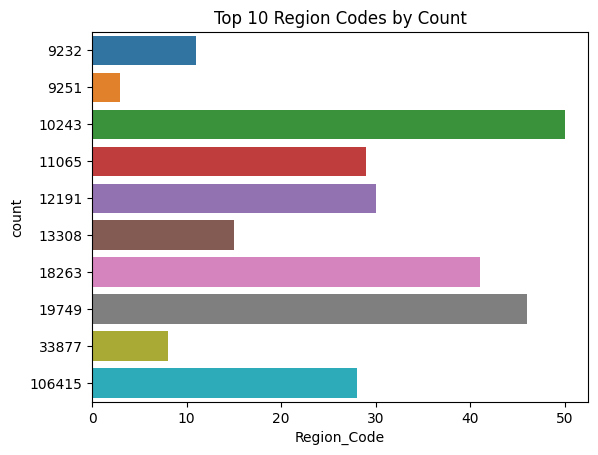

In [18]:
sns.barplot(x = df.Region_Code.value_counts().head(10).index,
           y = df.Region_Code.value_counts().head(10),orient='h',palette='tab10')
plt.title('Top 10 Region Codes by Count')
plt.show()

In [20]:
df.Region_Code.value_counts().sort_values(ascending=False).head(10)

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
Name: count, dtype: int64

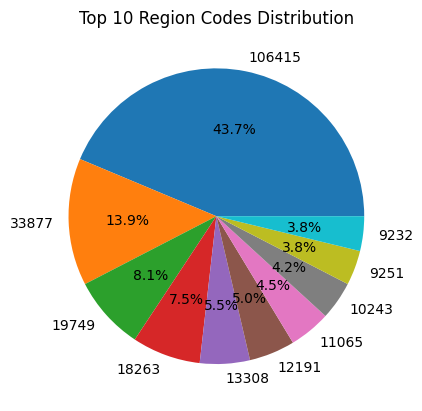

In [19]:
plt.pie(x=df.Region_Code.value_counts().sort_values(ascending=False).head(10),labels=df.Region_Code.value_counts().head(10)
       ,autopct='%1.1f%%')
plt.title('Top 10 Region Codes Distribution')
plt.show()

#### Policy Analysis

In [21]:
df.Policy_Sales_Channel.value_counts().head(15)

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
Name: count, dtype: int64

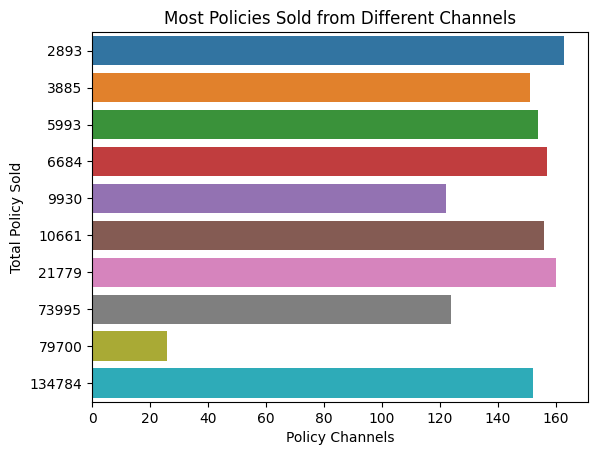

In [22]:
sns.barplot(x = df.Policy_Sales_Channel.value_counts().head(10).index,
           y = df.Policy_Sales_Channel.value_counts().head(10),orient='h',palette='tab10')
plt.xlabel('Policy Channels')
plt.ylabel('Total Policy Sold')
plt.title('Most Policies Sold from Different Channels')
plt.show()

#### Claim Frequency by Vehicle Damage

In [23]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

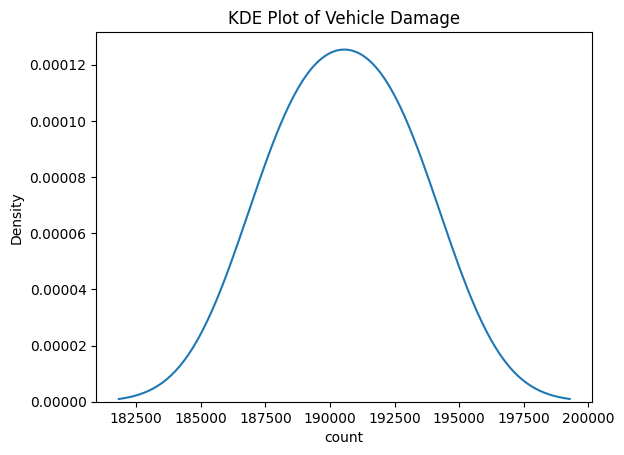

In [34]:
sns.kdeplot(df.Vehicle_Damage.value_counts())
plt.title('KDE Plot of Vehicle Damage')
plt.show()

#### Customer Loyalty

In [25]:
df.Previously_Insured.value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

In [26]:
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

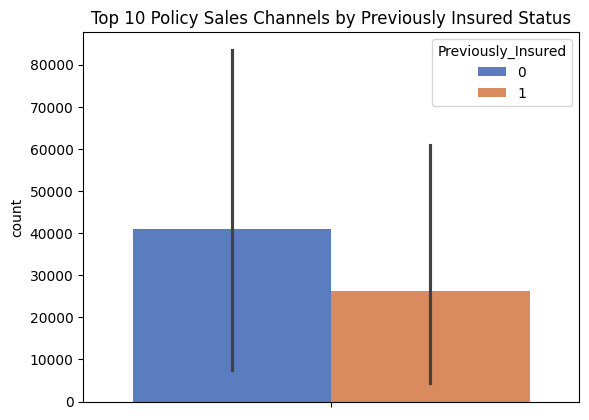

In [27]:
sns.barplot(y=df.Policy_Sales_Channel.value_counts().head(10),hue=df.Previously_Insured,palette='muted')
plt.title('Top 10 Policy Sales Channels by Previously Insured Status')
plt.show()